# Business Question/Understanding
A financial institution is interested in finding what questions should they be asking a prospect to determined if the loan will be repaid.
## step 1
import libraries and data

In [1]:
import warnings
warnings. filterwarnings("ignore")
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('LoansTrainingSet.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


## step 2 data exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

look at the totall missing values for each column

In [3]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [4]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [5]:
df['Loan ID'].nunique()

215700

In [6]:
df['Loan ID'].value_counts()

6a6c1a55-ffdd-4d83-a1fc-c3172f1269bc    4
7fb3764b-41d1-490a-ae20-519f52f57ec6    4
c63a3856-d3f2-4688-a453-68fea77c7485    4
203116c4-2d56-410b-8bb4-759385a5d5b9    4
f6b73804-d743-4157-9318-1f734add3c60    4
e769377c-5231-4798-bee9-bb3d40858577    4
8ec1ceab-5b04-44b5-9104-6883640dd112    4
fb111476-b40f-4c5d-957d-e19bea1cf4d6    4
094314ab-0d40-4128-abb6-c2202834fb38    4
15b3c02a-76a3-48cf-b0ec-9809043f1c3a    4
6b5e6c87-50b8-4062-bebd-0d90b2522c0f    4
a75b8c35-a38e-4c3e-927d-97a5ebc6decf    4
0c15c9d6-2162-454c-9c06-27497f676dbe    4
1573869c-f52f-434e-94f1-e231bfeb0e3a    4
56cf7eae-96dd-4864-b686-4a12a46e77a3    4
bbf7a3d6-c415-417e-b6a1-5095a6a5fcca    4
c0a34486-61a2-4d15-97f3-a713ac0c7b3e    4
35eb54cf-f061-4345-866c-0165701e3590    4
afd80564-9b2e-4796-915c-ab0331813cad    4
99a45dc4-95be-493c-9702-307e80c6cc47    4
f1f504ad-28de-4642-8001-d4501ddfb124    4
a4290839-de66-4452-9304-d90a08ccfa9e    4
d2232084-e9a8-4a66-865c-29a035959f3c    4
505d297d-90ba-41da-a490-ae465c9dc8

In [7]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

## change loan status from words to numbers

In [8]:
df['Loan Status1']=df['Loan Status']

In [9]:
df['Loan Status1']=df['Loan Status1'].map(lambda x:1 if x=='Fully Paid' else 0)

In [10]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [11]:
df['Term1']=df['Term']

In [12]:
df['Term1']=df.Term1.astype("category").cat.codes

In [13]:
df['Purpose1']=df['Purpose']

In [14]:
df['Purpose1']=df.Purpose1.astype("category").cat.codes

In [15]:
df['Home_Ownership1']=df['Home Ownership']

In [16]:
df['Home_Ownership1']=df.Home_Ownership1.astype("category").cat.codes

In [17]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status1,Term1,Purpose1,Home_Ownership1
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,...,10,0,6760,16056,0.0,0.0,1,1,3,1
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,...,17,0,6262,19149,0.0,0.0,1,1,9,1
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,...,5,0,20967,28335,0.0,0.0,1,1,3,1
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,...,9,0,22529,43915,0.0,0.0,1,1,3,2
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,...,12,0,17391,37081,0.0,0.0,1,1,3,3


# Data Exploration
## Loan Status

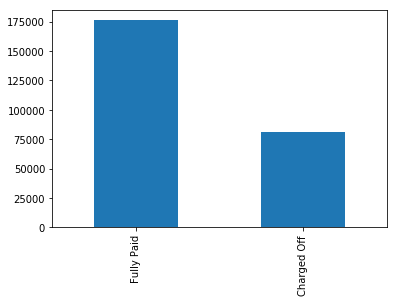

In [18]:
df['Loan Status'].value_counts().plot(kind='bar')

In [19]:
df.shape

(256984, 23)

In [20]:
df['Loan ID'].nunique()

215700

## Taking out duplicate Loan Id
This splits the df into one with only object categories and the other that aree the integer categories (numerical)

In [21]:
df1=df.select_dtypes(include=['object'])
df2=df.select_dtypes(exclude=['object'])

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 9 columns):
Loan ID                 256984 non-null object
Customer ID             256984 non-null object
Loan Status             256984 non-null object
Term                    256984 non-null object
Years in current job    245508 non-null object
Home Ownership          256984 non-null object
Purpose                 256984 non-null object
Monthly Debt            256984 non-null object
Maximum Open Credit     256984 non-null object
dtypes: object(9)
memory usage: 17.6+ MB


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 14 columns):
Current Loan Amount             256984 non-null int64
Credit Score                    195308 non-null float64
Annual Income                   195308 non-null float64
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Bankruptcies                    256455 non-null float64
Tax Liens                       256961 non-null float64
Loan Status1                    256984 non-null int64
Term1                           256984 non-null int8
Purpose1                        256984 non-null int8
Home_Ownership1                 256984 non-null int8
dtypes: float64(6), int64(5), int8(3)
memory usage: 22.3 MB


**Placing Loan ID back into the df2 data frame**
Since df2 is for integers and Loan ID isn't an int you need to re-insert. 

In [24]:
df2['Loan ID']=df['Loan ID']
df2.tail(2)

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status1,Term1,Purpose1,Home_Ownership1,Loan ID
256982,12116,746.0,52504.0,15.1,82.0,8,0,3315,0.0,0.0,0,1,3,1,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe
256983,27902,678.0,117480.0,18.0,11.0,10,0,28317,0.0,0.0,1,0,3,1,ffffe32e-ed17-459f-9cfd-7b9ee7972933


In [25]:
df1=df1.drop_duplicates(subset=['Loan ID'])
df2=df2.groupby('Loan ID').max().reset_index()

In [26]:
df1.head(2)

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,$584.03,16056
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,4 years,Home Mortgage,other,"$1,106.04",19149


In [27]:
df=df1.merge(df2)

## now the multiple loan id are gone

In [28]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Term                                 0
Years in current job              8990
Home Ownership                       0
Purpose                              0
Monthly Debt                         0
Maximum Open Credit                  0
Current Loan Amount                  0
Credit Score                     44498
Annual Income                    44498
Years of Credit History              0
Months since last delinquent    118262
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Bankruptcies                       452
Tax Liens                           22
Loan Status1                         0
Term1                                0
Purpose1                             0
Home_Ownership1                      0
dtype: int64

## Credit Score

In [29]:
df['Credit Score'].min(),df['Credit Score'].max()

(585.0, 7510.0)

##### Credit Score is suppose to only contain values ranging from 0 to 800, but the max is 7510. This needs to be further investigated

In [30]:
#takes any credit score higher than 850 
df[df['Credit Score']>850].head()

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status1,Term1,Purpose1,Home_Ownership1
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,Long Term,6 years,Rent,Business Loan,$542.29,16954,24613,...,73.0,7,0,14123,0.0,0.0,0,0,0,3
45,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,Short Term,1 year,Own Home,Debt Consolidation,$633.29,24317,6463,...,74.0,9,0,8025,0.0,0.0,0,1,3,2
60,000f1140-ef9f-42f9-9898-f9b3162bf0da,442c2d9b-3d95-44a9-bcb4-0dc80a941e3c,Charged Off,Short Term,10+ years,Home Mortgage,Debt Consolidation,$538.15,7811,6007,...,13.0,6,0,5077,0.0,0.0,0,1,3,1
61,000f5c35-dc3e-415f-9c22-e355ef96d78b,0ecf29b6-93eb-4c13-b853-a9cbdfc7f85b,Charged Off,Long Term,2 years,Rent,Debt Consolidation,"$1,931.07",90199,12899,...,7.0,16,0,39417,0.0,0.0,0,0,3,3
66,001227a1-4490-47c6-ada7-20faf636e9a3,3d4a8985-0b72-4084-8b20-f441d9868483,Charged Off,Short Term,< 1 year,Home Mortgage,Other,$711.03,12041,5060,...,22.0,6,0,10777,0.0,0.0,0,1,7,1


We can see that htere is an additional 0, that changes the credit score into thousands. It is safe to assume these credit score values were incorrectly inputted as they all end with a 0. without the 0, the values of 'Credit Score' fall within the appropriate range. We will only altar the credit scores that are abbove 850 by dividing 'Credit Scores' by 10. 

In [31]:
df['Credit Score']=df['Credit Score'].map(
    lambda x: x/10 if x>850 else x)
df['Credit Score'].head(20)

0     741.0
1     734.0
2     747.0
3     747.0
4     746.0
5     716.0
6     664.0
7       NaN
8     733.0
9     742.0
10    742.0
11    701.0
12    744.0
13    744.0
14    729.0
15    734.0
16      NaN
17    745.0
18    734.0
19    733.0
Name: Credit Score, dtype: float64

from above we still have NaN values in 'Credit Score' column, we have two option:<br>
1. Fill the NaN's
2. Remove all NaN's<br></br>
Let's check what type of distribution 'Credit Score' is to see how we can fill null values. This helps us decide what's the best option

## filling credit score

#### plot a histogram of credit scores without missing data

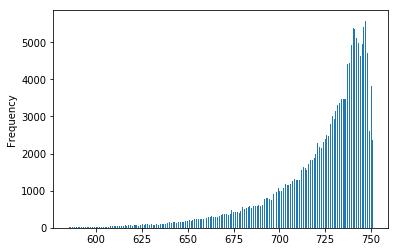

In [32]:
df['Credit Score'].dropna().plot(kind='hist',bins=300)

#### Mean Median mode of credit score

In [33]:
df['Credit Score'].mean(),df['Credit Score'].median(), df['Credit Score'].mode()

(722.7556979474539, 732.0, 0    747.0
 dtype: float64)

In [34]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status1,Term1,Purpose1,Home_Ownership1
Current Loan Amount,1.000000,0.062514,0.019233,0.012003,0.000861,-0.000897,0.001095,0.002305,0.003645,-0.001876,0.209140,0.031782,0.001380,-0.016000
Credit Score,0.062514,1.000000,0.014844,0.085461,0.044787,-0.038642,-0.062030,-0.014965,-0.048202,-0.027476,0.245848,0.483576,-0.051942,-0.053519
Annual Income,0.019233,0.014844,1.000000,0.155115,-0.058157,0.145422,-0.017196,0.305022,-0.047313,0.036216,0.064451,-0.066624,-0.004785,-0.174560
Years of Credit History,0.012003,0.085461,0.155115,1.000000,-0.039987,0.130020,0.060393,0.202269,0.061128,0.021056,0.030149,-0.034613,-0.015397,-0.199058
Months since last delinquent,0.000861,0.044787,-0.058157,-0.039987,1.000000,-0.037506,0.091436,-0.025878,0.116348,0.002201,0.019400,0.012539,-0.006694,0.048317
Number of Open Accounts,-0.000897,-0.038642,0.145422,0.130020,-0.037506,1.000000,-0.015721,0.221711,-0.024167,0.004558,-0.017602,-0.077691,-0.075553,-0.140325
Number of Credit Problems,0.001095,-0.062030,-0.017196,0.060393,0.091436,-0.015721,1.000000,-0.106362,0.763386,0.579014,-0.009090,0.018104,0.003519,-0.001937
Current Credit Balance,0.002305,-0.014965,0.305022,0.202269,-0.025878,0.221711,-0.106362,1.000000,-0.120069,-0.012301,0.007107,-0.088358,-0.061775,-0.164746
Bankruptcies,0.003645,-0.048202,-0.047313,0.061128,0.116348,-0.024167,0.763386,-0.120069,1.000000,0.049835,0.000139,0.019868,-0.001468,0.002270
Tax Liens,-0.001876,-0.027476,0.036216,0.021056,0.002201,0.004558,0.579014,-0.012301,0.049835,1.000000,-0.010736,0.003069,0.000673,-0.003302


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 215699
Data columns (total 23 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            206710 non-null object
Home Ownership                  215700 non-null object
Purpose                         215700 non-null object
Monthly Debt                    215700 non-null object
Maximum Open Credit             215700 non-null object
Current Loan Amount             215700 non-null int64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current C

#### use KNN to fill credit score
first time: Since non of the int has any correlation with credit score I  will use only the object variables to fill Credit score
second time: since when using the median to fill the missing numbers and rece

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 15 columns):
Loan ID                         215700 non-null object
Current Loan Amount             215700 non-null int64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current Credit Balance          215700 non-null int64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
Loan Status1                    215700 non-null int64
Term1                           215700 non-null int8
Purpose1                        215700 non-null int8
Home_Ownership1                 215700 non-null int8
dtypes: float64(6), int64(5), int8(3), object(1)
memory usage: 20.4+ M

In [37]:
df3=df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 15 columns):
Loan ID                         215700 non-null object
Current Loan Amount             215700 non-null int64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current Credit Balance          215700 non-null int64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
Loan Status1                    215700 non-null int64
Term1                           215700 non-null int8
Purpose1                        215700 non-null int8
Home_Ownership1                 215700 non-null int8
dtypes: float64(6), int64(5), int8(3), object(1)
memory usage: 20.4+ M

In [38]:
df3.drop('Loan ID', axis=1, inplace=True)

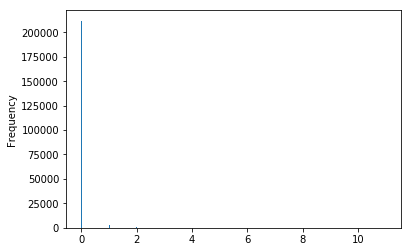

In [39]:
df['Tax Liens'].dropna().plot(kind='hist', bins=300)

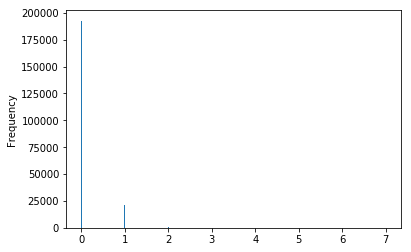

In [40]:
df3['Bankruptcies'].dropna().plot(kind='hist',bins=300)

In [41]:
df3['Bankruptcies'].describe()

count    215248.000000
mean          0.110556
std           0.336853
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: Bankruptcies, dtype: float64

In [42]:
df3.drop(['Months since last delinquent','Annual Income','Tax Liens','Bankruptcies'], axis= 1, inplace=True)

In [43]:
df3.isnull().sum()

Current Loan Amount              0
Credit Score                 44498
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Loan Status1                     0
Term1                            0
Purpose1                         0
Home_Ownership1                  0
dtype: int64

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 10 columns):
Current Loan Amount          215700 non-null int64
Credit Score                 171202 non-null float64
Years of Credit History      215700 non-null float64
Number of Open Accounts      215700 non-null int64
Number of Credit Problems    215700 non-null int64
Current Credit Balance       215700 non-null int64
Loan Status1                 215700 non-null int64
Term1                        215700 non-null int8
Purpose1                     215700 non-null int8
Home_Ownership1              215700 non-null int8
dtypes: float64(2), int64(5), int8(3)
memory usage: 12.1 MB


In [45]:
df3m=df3[df3['Credit Score'].isnull()]

In [46]:
df3m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44498 entries, 7 to 215696
Data columns (total 10 columns):
Current Loan Amount          44498 non-null int64
Credit Score                 0 non-null float64
Years of Credit History      44498 non-null float64
Number of Open Accounts      44498 non-null int64
Number of Credit Problems    44498 non-null int64
Current Credit Balance       44498 non-null int64
Loan Status1                 44498 non-null int64
Term1                        44498 non-null int8
Purpose1                     44498 non-null int8
Home_Ownership1              44498 non-null int8
dtypes: float64(2), int64(5), int8(3)
memory usage: 2.8 MB


In [47]:
df3f=df3[df3['Credit Score'].notnull()]

In [48]:
df3f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171202 entries, 0 to 215699
Data columns (total 10 columns):
Current Loan Amount          171202 non-null int64
Credit Score                 171202 non-null float64
Years of Credit History      171202 non-null float64
Number of Open Accounts      171202 non-null int64
Number of Credit Problems    171202 non-null int64
Current Credit Balance       171202 non-null int64
Loan Status1                 171202 non-null int64
Term1                        171202 non-null int8
Purpose1                     171202 non-null int8
Home_Ownership1              171202 non-null int8
dtypes: float64(2), int64(5), int8(3)
memory usage: 10.9 MB


In [49]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [50]:
k.fit(df3f.drop('Credit Score', axis=1),df3f['Credit Score'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,precision_score

In [52]:
cspred=k.predict(df3m.drop('Credit Score', axis=1))

In [53]:
cspred.shape

(44498,)

In [54]:
df3m['Credit Score']=cspred

In [55]:
df3m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44498 entries, 7 to 215696
Data columns (total 10 columns):
Current Loan Amount          44498 non-null int64
Credit Score                 44498 non-null float64
Years of Credit History      44498 non-null float64
Number of Open Accounts      44498 non-null int64
Number of Credit Problems    44498 non-null int64
Current Credit Balance       44498 non-null int64
Loan Status1                 44498 non-null int64
Term1                        44498 non-null int8
Purpose1                     44498 non-null int8
Home_Ownership1              44498 non-null int8
dtypes: float64(2), int64(5), int8(3)
memory usage: 2.8 MB


In [56]:
df3a=df3m.append(df3f)

In [57]:
df3a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 7 to 215699
Data columns (total 10 columns):
Current Loan Amount          215700 non-null int64
Credit Score                 215700 non-null float64
Years of Credit History      215700 non-null float64
Number of Open Accounts      215700 non-null int64
Number of Credit Problems    215700 non-null int64
Current Credit Balance       215700 non-null int64
Loan Status1                 215700 non-null int64
Term1                        215700 non-null int8
Purpose1                     215700 non-null int8
Home_Ownership1              215700 non-null int8
dtypes: float64(2), int64(5), int8(3)
memory usage: 13.8 MB


In [58]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Term                                 0
Years in current job              8990
Home Ownership                       0
Purpose                              0
Monthly Debt                         0
Maximum Open Credit                  0
Current Loan Amount                  0
Credit Score                     44498
Annual Income                    44498
Years of Credit History              0
Months since last delinquent    118262
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Bankruptcies                       452
Tax Liens                           22
Loan Status1                         0
Term1                                0
Purpose1                             0
Home_Ownership1                      0
dtype: int64

In [59]:
dfm=df[df['Credit Score'].isnull()]

In [60]:
dff=df[df['Credit Score'].notnull()]

In [61]:
dfm['Credit Score']=cspred

In [62]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44498 entries, 7 to 215696
Data columns (total 23 columns):
Loan ID                         44498 non-null object
Customer ID                     44498 non-null object
Loan Status                     44498 non-null object
Term                            44498 non-null object
Years in current job            42831 non-null object
Home Ownership                  44498 non-null object
Purpose                         44498 non-null object
Monthly Debt                    44498 non-null object
Maximum Open Credit             44498 non-null object
Current Loan Amount             44498 non-null int64
Credit Score                    44498 non-null float64
Annual Income                   0 non-null float64
Years of Credit History         44498 non-null float64
Months since last delinquent    20086 non-null float64
Number of Open Accounts         44498 non-null int64
Number of Credit Problems       44498 non-null int64
Current Credit Balance       

In [63]:
dfm.shape

(44498, 23)

In [64]:
dff.shape

(171202, 23)

In [65]:
dfa=dfm.append(dff)

In [66]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 7 to 215699
Data columns (total 23 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            206710 non-null object
Home Ownership                  215700 non-null object
Purpose                         215700 non-null object
Monthly Debt                    215700 non-null object
Maximum Open Credit             215700 non-null object
Current Loan Amount             215700 non-null int64
Credit Score                    215700 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current C

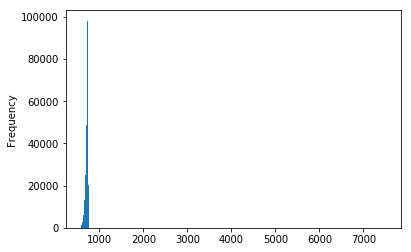

In [67]:
dfa['Credit Score'].dropna().plot(kind='hist',bins=300)

## Annual Income

In [68]:
dfa['Annual Income'].min(skipna=False),df['Annual Income'].max()

(nan, 8713547.0)

In [69]:
dfa[dfa['Annual Income']>2000000]

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status1,Term1,Purpose1,Home_Ownership1
28599,21ea699e-4eea-4908-9d67-7ae36f31d221,4e0d2d18-db25-40f6-ab3a-7746cd676d2e,Fully Paid,Short Term,10+ years,Home Mortgage,Home Improvements,$783.92,9308,99999999,...,40.0,4,0,8917,0.0,0.0,1,1,5,1
33412,2790a78c-3405-4403-b9fa-c46dcb296c02,824b8012-5314-453d-aa28-b9ee9e4bfded,Fully Paid,Short Term,7 years,Home Mortgage,Home Improvements,"$4,516.24",42017,99999999,...,NaN,8,0,40925,0.0,0.0,1,1,5,1
92786,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,Short Term,10+ years,Home Mortgage,Debt Consolidation,$798.74,30429,8006,...,NaN,11,0,16462,0.0,0.0,0,1,3,1
142086,a88c6d42-44b3-4a29-afdf-84e31a4ce246,419bfdfe-66fa-4e7e-a568-e4e090c39796,Fully Paid,Short Term,3 years,Home Mortgage,Home Improvements,$564.24,15725,9899,...,21.0,18,0,2469,0.0,0.0,1,1,5,1


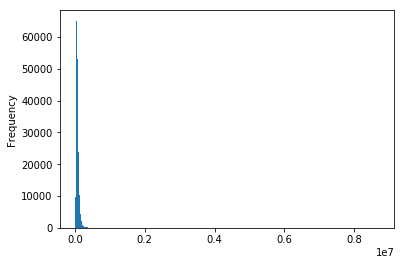

In [70]:
dfa['Annual Income'].dropna().plot(kind='hist',bins=300)

In [71]:
dfa['Annual Income'].isnull().sum()

44498

In [72]:
dfa['Annual Income']=dfa['Annual Income'].fillna(dfa[
    'Annual Income'].median())

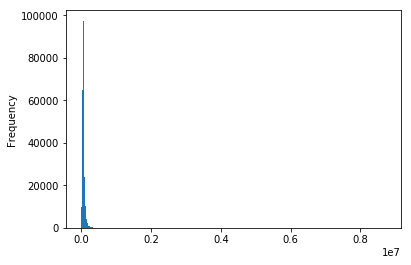

In [73]:
dfa['Annual Income'].plot(kind='hist',bins=300)

In [74]:
dfa.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Term                             object
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                     object
Maximum Open Credit              object
Current Loan Amount               int64
Credit Score                    float64
Annual Income                   float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Bankruptcies                    float64
Tax Liens                       float64
Loan Status1                      int64
Term1                              int8
Purpose1                           int8
Home_Ownership1                    int8
dtype: object

## Monthly Debt and Maximum Open Credit
Monthly debt and maximum open credit shows an object, but they should be float 65 since they are numeric values

In [75]:
#convert monthly debt to float
dfa['Monthly Debt']=dfa['Monthly Debt'].replace( '[\$, ]',
                                             '', regex=True 
                                             ).astype(float)
dfa['Monthly Debt'].head()

7     386.36
16    439.56
20    262.27
30    206.97
46    425.68
Name: Monthly Debt, dtype: float64

In [76]:
dfa[dfa['Maximum Open Credit']=='#VALUE!']

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status1,Term1,Purpose1,Home_Ownership1
154841,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,Short Term,2 years,Rent,Debt Consolidation,506.34,#VALUE!,1470,...,26.0,3,0,0,0.0,0.0,0,1,3,3
157242,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,Long Term,7 years,Home Mortgage,Home Improvements,1306.86,#VALUE!,23897,...,NaN,6,0,0,0.0,0.0,0,0,5,1


In [77]:
dfa['Maximum Open Credit']=dfa[
    'Maximum Open Credit'].convert_objects(convert_numeric=True)
dfa['Maximum Open Credit'].head()

7     16579.0
16    15866.0
20     9330.0
30    13975.0
46     6850.0
Name: Maximum Open Credit, dtype: float64

In [78]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 7 to 215699
Data columns (total 23 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            206710 non-null object
Home Ownership                  215700 non-null object
Purpose                         215700 non-null object
Monthly Debt                    215700 non-null float64
Maximum Open Credit             215698 non-null float64
Current Loan Amount             215700 non-null int64
Credit Score                    215700 non-null float64
Annual Income                   215700 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current

## fill max open credit

In [79]:
dfa['Maximum Open Credit'].describe()

count    2.156980e+05
mean     3.698381e+04
std      6.011805e+05
min      0.000000e+00
25%      1.296100e+04
50%      2.206000e+04
75%      3.681000e+04
max      1.763322e+08
Name: Maximum Open Credit, dtype: float64

In [80]:
dfa['Maximum Open Credit'].mean(),dfa['Maximum Open Credit'].median(),dfa['Maximum Open Credit'].mode()

(36983.81481052212, 22060.0, 0    0.0
 dtype: float64)

In [81]:
dfa['Maximum Open Credit']= dfa['Maximum Open Credit'].fillna(dfa['Maximum Open Credit'].median())

In [82]:
dfa.nunique()

Loan ID                         215700
Customer ID                     215700
Loan Status                          2
Term                                 2
Years in current job                11
Home Ownership                       4
Purpose                             10
Monthly Debt                    128755
Maximum Open Credit              68883
Current Loan Amount              27308
Credit Score                       201
Annual Income                    60412
Years of Credit History            541
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           45630
Bankruptcies                         8
Tax Liens                           12
Loan Status1                         2
Term1                                2
Purpose1                            10
Home_Ownership1                      4
dtype: int64

In [83]:
dfa.shape

(215700, 23)

In [84]:
print ("Loan Status", df['Loan Status'].unique())
print("Term: ", df['Term'].unique())
print("Years in current job: ",df['Years in current job'].unique())
print("Home Ownership: ", df['Home Ownership'].unique())
print("Purpose: ",df['Purpose'].unique())

Loan Status ['Fully Paid' 'Charged Off']
Term:  ['Short Term' 'Long Term']
Years in current job:  ['10+ years' '4 years' '6 years' '5 years' nan '3 years' '2 years'
 '< 1 year' '1 year' '7 years' '9 years' '8 years']
Home Ownership:  ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
Purpose:  ['Debt Consolidation' 'other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Other' 'Buy a Car' 'Medical Bills' 'Take a Trip'
 'Educational Expenses']


In [85]:
#conver havemortagage to home mortgage
dfa['Home Ownership']=dfa['Home Ownership'].map(
    lambda x: 'Home Mortgage' if x=='HaveMortgage' else x)

In [86]:
#convert 'toher to 'Other'
dfa['Purpose']=dfa['Purpose'].map(
    lambda x:'Other' if x=='other' else x)

In [87]:
#check unique values
print("Home Ownership: ", dfa['Home Ownership'].unique())
print("Purpose: ", dfa['Purpose'].unique())

Home Ownership:  ['Rent' 'Home Mortgage' 'Own Home']
Purpose:  ['Debt Consolidation' 'Other' 'Buy a Car' 'Buy House' 'Medical Bills'
 'Home Improvements' 'Business Loan' 'Take a Trip' 'Educational Expenses']


In [88]:
dfa.drop(['Home_Ownership1','Purpose1'],axis=1,inplace=True)

## Months Since Last Delinquent

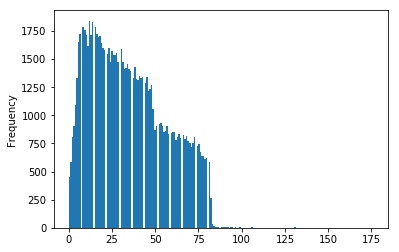

In [89]:
dfa['Months since last delinquent'].dropna().plot(kind='hist',bins=200)

#### Prepare data for plotting

Text(0.5, 0, 'Months since last delinquent')

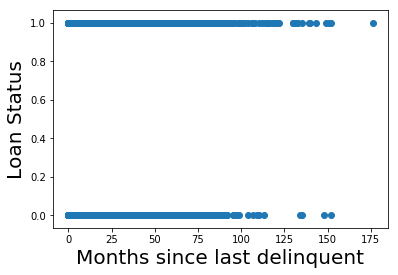

In [90]:
#make new dataframe without null values
df2=dfa[dfa['Months since last delinquent'].notnull()]
x=df2['Months since last delinquent']
y=df2['Loan Status'].map(lambda x:1 if x=='Fully Paid' else 0)

#make the plot
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.set_ylabel('Loan Status', fontsize=20)
ax.set_xlabel('Months since last delinquent',fontsize=20)

By plotting the "Months since last delinquent" vs "loan status", we can see if there is any correlation between the months since last delinquent to the loan status being paid off or not. According to the plot, there is no distinguishable differences between the two variables, thus we can assume that "Months since last delinquent" may not contribute much to our prediction model. Therefore, we will drop this column.

In [91]:
dfa=dfa.drop(['Months since last delinquent'], axis=1)

## Look at Remaining null Values in
## "Bankruptcies" and "Tax Liens"

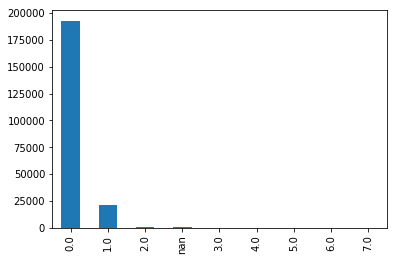

In [92]:
dfa.Bankruptcies.value_counts(dropna=False).plot(kind='bar')

**Plotting bankruptcies**

Text(0.5, 0, 'Bankruptcies')

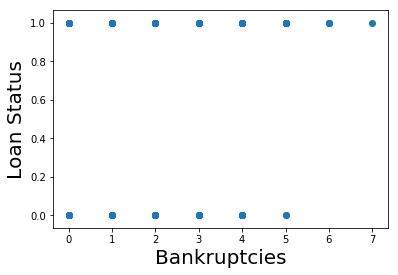

In [93]:
#makes new dataframe without null values
df2= dfa[dfa['Bankruptcies'].notnull()]
x= df2['Bankruptcies']
y=df2['Loan Status'].map(lambda x:1 if x=='Fully Paid' else 0)

# make the plot
fig= plt.figure()
ax= fig.add_subplot(111)
ax.scatter(x,y)
ax.set_ylabel('Loan Status', fontsize=20)
ax.set_xlabel('Bankruptcies', fontsize=20)

Looking at both Bankruptcies and tax liens, there does not seem to be much data missing relative to the number of rows. Also, plotting them against loan status does not show any noticeable correlations. Therefore, we will be dropping the null rows for htese vairables as well.

### Dropping the null values for "Bankruptcies" and "Tax Liens"
* we do this by only including the data is not null in the dataframe

In [94]:
dfa=dfa[dfa['Bankruptcies'].notnull()]
dfa=dfa[dfa['Tax Liens'].notnull()]
dfa.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 7 to 215699
Data columns (total 20 columns):
Loan ID                      215248 non-null object
Customer ID                  215248 non-null object
Loan Status                  215248 non-null object
Term                         215248 non-null object
Years in current job         206258 non-null object
Home Ownership               215248 non-null object
Purpose                      215248 non-null object
Monthly Debt                 215248 non-null float64
Maximum Open Credit          215248 non-null float64
Current Loan Amount          215248 non-null int64
Credit Score                 215248 non-null float64
Annual Income                215248 non-null float64
Years of Credit History      215248 non-null float64
Number of Open Accounts      215248 non-null int64
Number of Credit Problems    215248 non-null int64
Current Credit Balance       215248 non-null int64
Bankruptcies                 215248 non-null float64
Tax

In [95]:
dfa.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Term                            0
Years in current job         8990
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Maximum Open Credit             0
Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Bankruptcies                    0
Tax Liens                       0
Loan Status1                    0
Term1                           0
dtype: int64

### Now we are going to look at years at current job to fill in the last na values

In [96]:
dfa['Years in current job'].value_counts()

10+ years    66628
2 years      19778
< 1 year     17432
3 years      17388
5 years      14967
1 year       14069
4 years      13601
6 years      12208
7 years      11702
8 years      10224
9 years       8261
Name: Years in current job, dtype: int64

In [97]:
#takes out all the spaces and + - and the words 'year'
dfa['Years in current job'].replace(
to_replace=['years','year',"<","\+"," "], value="", regex=True, inplace=True)

In [98]:
dfa['Years in current job'].value_counts()

10    66628
1     31501
2     19778
3     17388
5     14967
4     13601
6     12208
7     11702
8     10224
9      8261
Name: Years in current job, dtype: int64

In [99]:
dfa['Years in current job']=dfa['Years in current job'].fillna(0)

In [100]:
dfa['Years in current job']=pd.Categorical(
    dfa['Years in current job'])

In [101]:
dfa[dfa['Years in current job'].isnull()]

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status1,Term1


In [102]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 7 to 215699
Data columns (total 20 columns):
Loan ID                      215248 non-null object
Customer ID                  215248 non-null object
Loan Status                  215248 non-null object
Term                         215248 non-null object
Years in current job         215248 non-null category
Home Ownership               215248 non-null object
Purpose                      215248 non-null object
Monthly Debt                 215248 non-null float64
Maximum Open Credit          215248 non-null float64
Current Loan Amount          215248 non-null int64
Credit Score                 215248 non-null float64
Annual Income                215248 non-null float64
Years of Credit History      215248 non-null float64
Number of Open Accounts      215248 non-null int64
Number of Credit Problems    215248 non-null int64
Current Credit Balance       215248 non-null int64
Bankruptcies                 215248 non-null float64
T

**double check that our data is cleaned**

In [103]:
print("Total unique Loan Ids: ", dfa['Loan ID'].nunique())
print("Total unique Customer IDs: ", dfa['Customer ID'].nunique())
print('Total Entries: ', len(dfa))

Total unique Loan Ids:  215248
Total unique Customer IDs:  215248
Total Entries:  215248


In [104]:
dfa['Loan Status']=dfa['Loan Status1']

In [105]:
dfa['Term']=dfa['Term1']

In [106]:
dfa.drop('Term1', axis=1, inplace=True)

In [107]:
#drop loan status1
dfa.drop('Loan Status1', axis=1, inplace=True)

In [108]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 7 to 215699
Data columns (total 18 columns):
Loan ID                      215248 non-null object
Customer ID                  215248 non-null object
Loan Status                  215248 non-null int64
Term                         215248 non-null int8
Years in current job         215248 non-null category
Home Ownership               215248 non-null object
Purpose                      215248 non-null object
Monthly Debt                 215248 non-null float64
Maximum Open Credit          215248 non-null float64
Current Loan Amount          215248 non-null int64
Credit Score                 215248 non-null float64
Annual Income                215248 non-null float64
Years of Credit History      215248 non-null float64
Number of Open Accounts      215248 non-null int64
Number of Credit Problems    215248 non-null int64
Current Credit Balance       215248 non-null int64
Bankruptcies                 215248 non-null float64
Tax 

# Feature Engineering 

In [109]:
import seaborn as sns

**Creating new features to lower dimensions**

### Feature Engineering for Debt to income ratio and ratio loan paid

In [110]:
dfa['debt_to_income']=(dfa['Monthly Debt']+1)/(
(dfa['Annual Income']+1)/12)

dfa['Ratio_loan_paid']=(dfa['Current Loan Amount']+1)/(
dfa['Current Credit Balance']+1)

In [111]:
dfa.head(2)

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,debt_to_income,Ratio_loan_paid
7,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,1,1,5,Rent,Debt Consolidation,386.36,16579.0,10036,740.0,62112.0,17.7,7,0,11970,0.0,0.0,0.074837,0.838443
16,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,1,1,3,Home Mortgage,Debt Consolidation,439.56,15866.0,7228,719.0,62112.0,17.8,13,1,8488,1.0,0.0,0.085115,0.851573


In [112]:
# import our algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score,recall_score, precision_score, confusion_matrix

In [113]:
x=dfa.drop(['Loan ID','Customer ID'],axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 7 to 215699
Data columns (total 18 columns):
Loan Status                  215248 non-null int64
Term                         215248 non-null int8
Years in current job         215248 non-null category
Home Ownership               215248 non-null object
Purpose                      215248 non-null object
Monthly Debt                 215248 non-null float64
Maximum Open Credit          215248 non-null float64
Current Loan Amount          215248 non-null int64
Credit Score                 215248 non-null float64
Annual Income                215248 non-null float64
Years of Credit History      215248 non-null float64
Number of Open Accounts      215248 non-null int64
Number of Credit Problems    215248 non-null int64
Current Credit Balance       215248 non-null int64
Bankruptcies                 215248 non-null float64
Tax Liens                    215248 non-null float64
debt_to_income               215248 non-null float64
Ra

In [114]:
x.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,debt_to_income,Ratio_loan_paid
7,1,1,5,Rent,Debt Consolidation,386.36,16579.0,10036,740.0,62112.0,17.7,7,0,11970,0.0,0.0,0.074837,0.838443
16,1,1,3,Home Mortgage,Debt Consolidation,439.56,15866.0,7228,719.0,62112.0,17.8,13,1,8488,1.0,0.0,0.085115,0.851573
20,1,1,10,Rent,Debt Consolidation,262.27,9330.0,4612,750.0,62112.0,14.0,4,0,8919,0.0,0.0,0.050863,0.517152
30,1,1,0,Home Mortgage,Debt Consolidation,206.97,13975.0,6114,728.0,62112.0,17.8,8,1,5772,1.0,0.0,0.040179,1.059241
46,1,1,0,Own Home,Other,425.68,6850.0,7068,699.0,62112.0,21.3,7,1,4178,1.0,0.0,0.082433,1.691553


In [115]:
X1=pd.get_dummies(x, drop_first=True)

In [116]:
y1=X1[['Loan Status']]
x1=X1.drop('Loan Status', axis= 1)

In [117]:
#split the data into 70% training data and 30% testing data with seed(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x1,y1, train_size=0.8, random_state=10)

In [118]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(172198, 34) (43050, 34) (172198, 1) (43050, 1)


In [119]:
#sklearn Logistic Regression
reg= LogisticRegression()
logmodel= reg.fit(X_train, y_train)

#make predictions and determine accuracy score
y_predlog= logmodel.predict(X_test)
acclog= accuracy_score(y_predlog, y_test)
print(acclog)

/Users/andreafung/anaconda3/envs/jpy_37/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8170034843205575


In [120]:
gbc=GradientBoostingClassifier()

In [121]:
gbc.fit(X_train, y_train)

/Users/andreafung/anaconda3/envs/jpy_37/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [122]:
y_predgbc= gbc.predict(X_test)
acclog= accuracy_score(y_predgbc, y_test)
print(acclog)

0.8240418118466899


In [123]:
preclog=precision_score(y_predgbc, y_test)
print(preclog)

0.9761173660866599


In [124]:
confm=confusion_matrix(y_test, y_predgbc)
confm

array([[ 1143,  6735],
       [  840, 34332]])

In [125]:
rec_log=recall_score(y_test, y_predgbc)
print(rec_log)

0.9761173660866599


In [126]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [127]:
gbc.feature_importances_

array([1.03455003e-01, 6.14090444e-04, 1.08670661e-02, 2.79709466e-01,
       1.27021499e-01, 4.22555971e-01, 3.44149824e-03, 1.36299698e-03,
       2.70516041e-04, 4.41329227e-03, 1.70398185e-04, 3.06145110e-04,
       2.49341971e-02, 1.12009581e-02, 9.85802919e-05, 4.32444639e-04,
       2.49316827e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.21190724e-03, 0.00000000e+00, 6.94870670e-05,
       6.15165725e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [128]:
X_train.columns

Index(['Term', 'Monthly Debt', 'Maximum Open Credit', 'Current Loan Amount',
       'Credit Score', 'Annual Income', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Bankruptcies', 'Tax Liens', 'debt_to_income',
       'Ratio_loan_paid', 'Years in current job_1', 'Years in current job_10',
       'Years in current job_2', 'Years in current job_3',
       'Years in current job_4', 'Years in current job_5',
       'Years in current job_6', 'Years in current job_7',
       'Years in current job_8', 'Years in current job_9',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip'],
      dtype='object')

In [129]:
dfb=pd.DataFrame(X_train.columns, gbc.feature_importances_)
dfb.columns=['variable']
dfb2=dfb.sort_index(ascending=False)

In [130]:
dfb2.head()

,variable
0.422556,Annual Income
0.279709,Current Loan Amount
0.127021,Credit Score
0.103455,Term
0.024934,debt_to_income


## creating inputoutput questions for institution

In [131]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 7 to 215699
Data columns (total 20 columns):
Loan ID                      215248 non-null object
Customer ID                  215248 non-null object
Loan Status                  215248 non-null int64
Term                         215248 non-null int8
Years in current job         215248 non-null category
Home Ownership               215248 non-null object
Purpose                      215248 non-null object
Monthly Debt                 215248 non-null float64
Maximum Open Credit          215248 non-null float64
Current Loan Amount          215248 non-null int64
Credit Score                 215248 non-null float64
Annual Income                215248 non-null float64
Years of Credit History      215248 non-null float64
Number of Open Accounts      215248 non-null int64
Number of Credit Problems    215248 non-null int64
Current Credit Balance       215248 non-null int64
Bankruptcies                 215248 non-null float64
Tax 

In [132]:
ten_df=dfa.copy()

In [133]:
df10=ten_df[['Annual Income', 'Current Loan Amount', 
        'Credit Score','Term',
        'debt_to_income','Ratio_loan_paid',
        'Maximum Open Credit','Home Ownership',
        'Current Credit Balance','Years of Credit History',
        'Monthly Debt','Loan Status'
       ]]

In [134]:
df10

,Annual Income,Current Loan Amount,Credit Score,Term,debt_to_income,Ratio_loan_paid,Maximum Open Credit,Home Ownership,Current Credit Balance,Years of Credit History,Monthly Debt,Loan Status
7,62112.0,10036,740.0,1,0.074837,0.838443,16579.0,Rent,11970,17.7,386.36,1
16,62112.0,7228,719.0,1,0.085115,0.851573,15866.0,Home Mortgage,8488,17.8,439.56,1
20,62112.0,4612,750.0,1,0.050863,0.517152,9330.0,Rent,8919,14.0,262.27,1
30,62112.0,6114,728.0,1,0.040179,1.059241,13975.0,Home Mortgage,5772,17.8,206.97,1
46,62112.0,7068,699.0,1,0.082433,1.691553,6850.0,Own Home,4178,21.3,425.68,1
56,62112.0,21075,658.0,1,0.426023,0.997161,34366.0,Rent,21135,18.0,2204.13,1
63,62112.0,2355,723.0,1,0.187281,0.352536,9319.0,Home Mortgage,6682,17.1,968.38,1
67,62112.0,6288,719.0,1,0.107332,1.771050,4025.0,Rent,3550,7.8,554.56,1
85,62112.0,10444,709.0,1,0.022480,3.780311,10543.0,Rent,2762,21.4,115.36,1
90,62112.0,6053,750.0,1,0.207363,11.917323,14497.0,Own Home,507,32.5,1072.33,1


In [135]:
X2=pd.get_dummies(df10, drop_first=True)

In [140]:
df10.to_csv('loanw.csv', index=False)

In [137]:
y1=X2[['Loan Status']]
x1=X2.drop('Loan Status', axis=1)

In [138]:
gbc.fit(x1,y1)

/Users/andreafung/anaconda3/envs/jpy_37/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [139]:
indf=pd.DataFrame(columns=['Annual Income', 'Current Loan Amount', 
        'Credit Score','Term',
        'debt_to_income','Ratio_loan_paid',
        'Maximum Open Credit','Home Ownership',
        'Current Credit Balance','Years of Credit History',
        'Monthly Debt','Loan Status'
       ])